In [ ]:
pip install pvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 48.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sympy import *
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pvlib
from pvlib.location import Location
import matplotlib.dates as mdates

# Indledende øvelser 

In [ ]:
L = 1762 * 10**-3
B = 1134 * 10**-3

In [ ]:
W_max = 425
average = W_max / (L*B)
print(average)

212.70121534972083


In [ ]:
irradiance = 1100
W = irradiance * (L*B)
kWh = (W*3600) / 1000
J = kWh * 3.6*10**6
print(kWh,"kWh, ", J, "J")

7912.5076800000015 kWh,  28485027648.000008 J


In [ ]:
Wh_m2 = (kWh*1000)/(L*B)
print(Wh_m2, "Wh/m^2")

3960000.0000000005 Wh/m^2


# Numpy opgaver

### 1. Kørsel af kode fra projektbeskrivelsen

Vi modellerer og tegner funktionen cos(t) i intervallet [0, 2π]. 

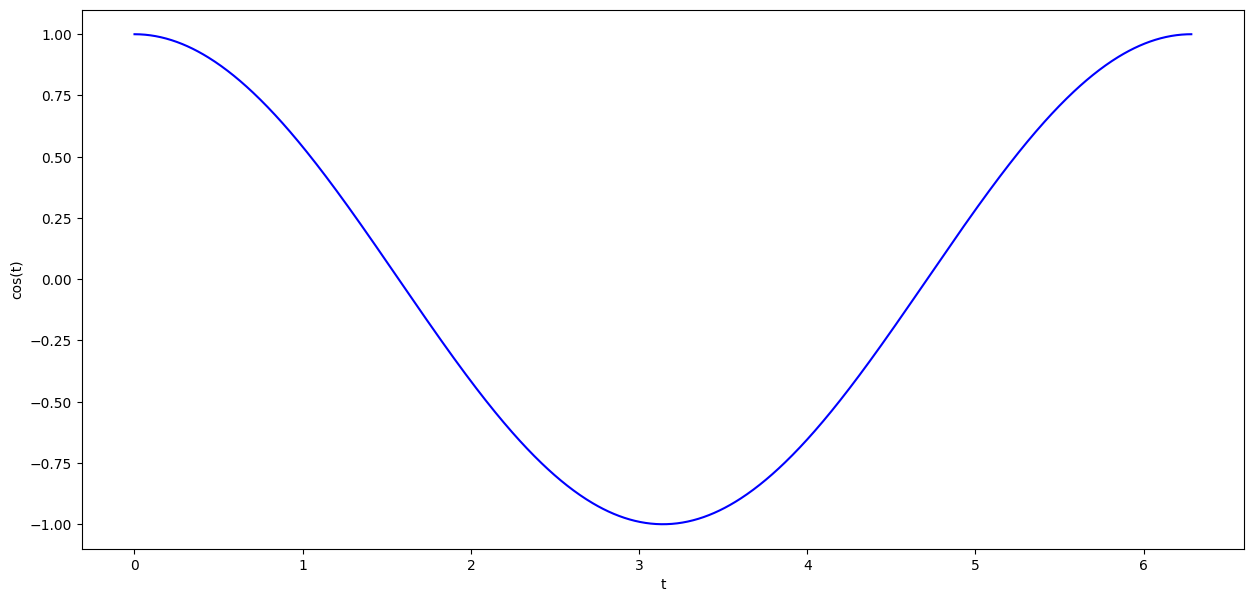

In [ ]:
figurstr = (15, 7)

t = np.linspace(0, 2 * np.pi, 1000)
f = np.cos(t)

plt.figure(figsize=figurstr)
plt.xlabel('t')
plt.ylabel('cos(t)')
plt.plot(t, f, color='b', linestyle='-')
plt.show()

Maksimum og minimum, samt indekset af disse, for funktionen og de tilhørende t-værdier. 

In [ ]:
print(f.max(), f.min(), f.argmax(), f.argmin(), t[f.argmax()], t[f.argmin()])


1.0 -0.9999950553174459 0 499 0.0 3.138447916198812


Funktionsværdier mindre end -0.95 og deres tilhørende t-værdier. 

In [ ]:
idx = f < -0.95
#print(f[idx], t[idx]) 

### 2. Skriv python-kode der finder alle funktionsværdier i f for intervallet [-0.5 , 0.5] og angiver tilhørende t-værdier

Funktionsværdier i intervallet [-0.05, 0.05] og tilhørende t-værdier

In [ ]:
indices = np.where((f >= -0.05) & (f <= 0.05))

f_values_within_interval = f[indices]
t_values_within_interval = t[indices]

print(f_values_within_interval, t_values_within_interval)

[ 0.04872413  0.0424412   0.0361566   0.02987056  0.02358334  0.01729519
  0.01100636  0.00471709 -0.00157237 -0.00786176 -0.01415085 -0.02043937
 -0.02672708 -0.03301374 -0.03929909 -0.04558289 -0.04558289 -0.03929909
 -0.03301374 -0.02672708 -0.02043937 -0.01415085 -0.00786176 -0.00157237
  0.00471709  0.01100636  0.01729519  0.02358334  0.02987056  0.0361566
  0.0424412   0.04872413] [1.5220529  1.52834237 1.53463185 1.54092132 1.5472108  1.55350027
 1.55978975 1.56607922 1.5723687  1.57865817 1.58494765 1.59123712
 1.59752659 1.60381607 1.61010554 1.61639502 4.66679029 4.67307976
 4.67936924 4.68565871 4.69194819 4.69823766 4.70452714 4.71081661
 4.71710609 4.72339556 4.72968504 4.73597451 4.74226399 4.74855346
 4.75484294 4.76113241]


### 3. Skriv en Python-funktion der kan findes begge fortegnsskift (nulpunkterne) af f

Funktion til fortegns ændring

In [ ]:

# Ikke færdig!!
def shift(array):
    shift_1 = []
    shift_time = [] 
    for i in range(len(array)):
        if i == 0:
            pass
        elif (array[i] >= 0 and array[i-1] < 0) or (array[i] <= 0 and array[i-1] > 0):
            shift_1.append(i)
            shift_time.append(i/1000) 
    return shift_1


# Solpositionsmodel

### 1. Skriv en Python-funktion def solar_elevation_angle(theta)

En funktion, der givet θ i grader udregner α i grader.

In [ ]:
def solar_elevation_angel(theta):
    return 90 - theta 

### 2. Find en rimelig værdi for r_s og angiv et matematisk udtryk for hvordan solens (x, y, z)-koordinater kan udregnes ud fra de sfæriske koordinater. 

Afstanden til solen:

In [ ]:
r_s = 147000000000

In [ ]:
def spherical_to_xyz(theta, phi):
    x = r_s * np.sin(theta) * np.cos(phi)
    y = r_s * np.sin(theta) * np.sin(phi)
    z = r_s * np.cos(theta)
    return x, y, z
    

### 3. Angiv et (matematisk) udtryk for u_p og prikprodukter af u_s og u_p...

In [ ]:
from sympy import *
theta_p, phi_p, theta_s, phi_s = symbols('theta_p phi_p theta_s phi_s')
us=Matrix([[sin(theta_s)*cos(phi_s)],[sin(theta_s)*sin(phi_s)],[cos(theta_s)]])
up=Matrix([[sin(theta_p)*cos(phi_p)],[sin(theta_p)*sin(phi_p)],[cos(theta_p)]])

print(trigsimp(up.dot(us)).simplify())

sin(theta_p)*sin(theta_s)*cos(phi_p - phi_s) + cos(theta_p)*cos(theta_s)


### 4. Skriv en Python-funktion def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel)

In [ ]:
def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    # Initialiser en liste til at gemme prikprodukterne for hver beregning
    dot_products = []
    for i in range(len(theta_sol)):
        #hvis solen er på den modsatte side af jorden:
        if np.deg2rad(theta_sol[i]) >= 0 and np.deg2rad(theta_sol[i]) <= np.pi/2:
            # Beregn enhedsvektorer for solens position og panelets position
            us = np.array([np.sin(theta_sol[i]) * np.cos(phi_sol[i]),
                        np.sin(theta_sol[i]) * np.sin(phi_sol[i]),
                        np.cos(theta_sol[i])])

            # Beregn enhedsvektoren for solpanelets normal ud fra de sfæriske koordinater 
            up = np.array([np.sin(theta_panel[i]) * np.cos(phi_panel[i]),
                            np.sin(theta_panel[i]) * np.sin(phi_panel[i]),
                            np.cos(theta_panel[i])])
        
            # Beregn prikproduktet af de to enhedsvektorer, som repræsenterer vinklen mellem dem
            dot_product = np.dot(us, up)
        else: 
            dot_product = 0
        # Prikproduktet må ikke være negativt; om nødvendigt sættes det til 0
        dot_product = max(0, dot_product)
        # Tilføj det beregnede prikprodukt til listen
        dot_products.append(dot_product)
        # Prikproduktet mellem solens og solpanelets enhedsvektorer udskrives
        print("Prikproduktet af us og up er:", dot_product)
    # Returner prikproduktet, hvis det er positivt, ellers returner 0
    return dot_products
    
# Eksempelværdier for solens og panelets sfæriske koordinater
theta_sol = np.array([np.pi / 4, np.pi / 2, 0.0])
phi_sol = np.array([np.pi, np.pi / 2, 0.0])
theta_panel = np.array([0.0, np.pi / 2, np.pi])
phi_panel = np.array([np.pi, 0.0, 0.0])

print(solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel))



Prikproduktet af us og up er: 0.7071067811865477
Prikproduktet af us og up er: 6.123233995736766e-17
Prikproduktet af us og up er: 0
[0.7071067811865477, 6.123233995736766e-17, 0]


# Solpositionsmodellering ved Pvlib

In [ ]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-1"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Definition af Lokationsobjekt. Koordinater og elevation af DTU, Lyngby (Danmark) 
site = Location(
    55.784932, 12.519436, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition af tidsinterval for simulering 
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
    )

times_h = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq='H', tz=tidszone
    )

# Estimerer solposition med Lokationsobjektet. 
solposmin = site.get_solarposition(times)

### 1. Estimering af solvinklerne

In [ ]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-1"
slut_dato = "2024-12-31"
delta_tid = "H"  # "Min", "H",

# Definition af Lokationsobjekt. Koordinater og elevation af DTU, Lyngby (Danmark) 
site = Location(
    55.784932, 12.519436, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition af tidsinterval for simulering 
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
    )


# Estimerer solposition med Lokationsobjektet. 
solpos = site.get_solarposition(times)

# Resulterende DataFrame visualiseres 
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-01-01 00:00:00+01:00,147.190267,147.190267,-57.190267,-57.190267,354.484016,-3.055576
2024-01-01 01:00:00+01:00,146.143338,146.143338,-56.143338,-56.143338,19.651941,-3.075359
2024-01-01 02:00:00+01:00,141.803746,141.803746,-51.803746,-51.803746,42.037164,-3.095135
2024-01-01 03:00:00+01:00,135.226212,135.226212,-45.226212,-45.226212,60.429158,-3.114902
2024-01-01 04:00:00+01:00,127.415615,127.415615,-37.415615,-37.415615,75.622496,-3.134661


### 2. Visualisering af solvinklerne 

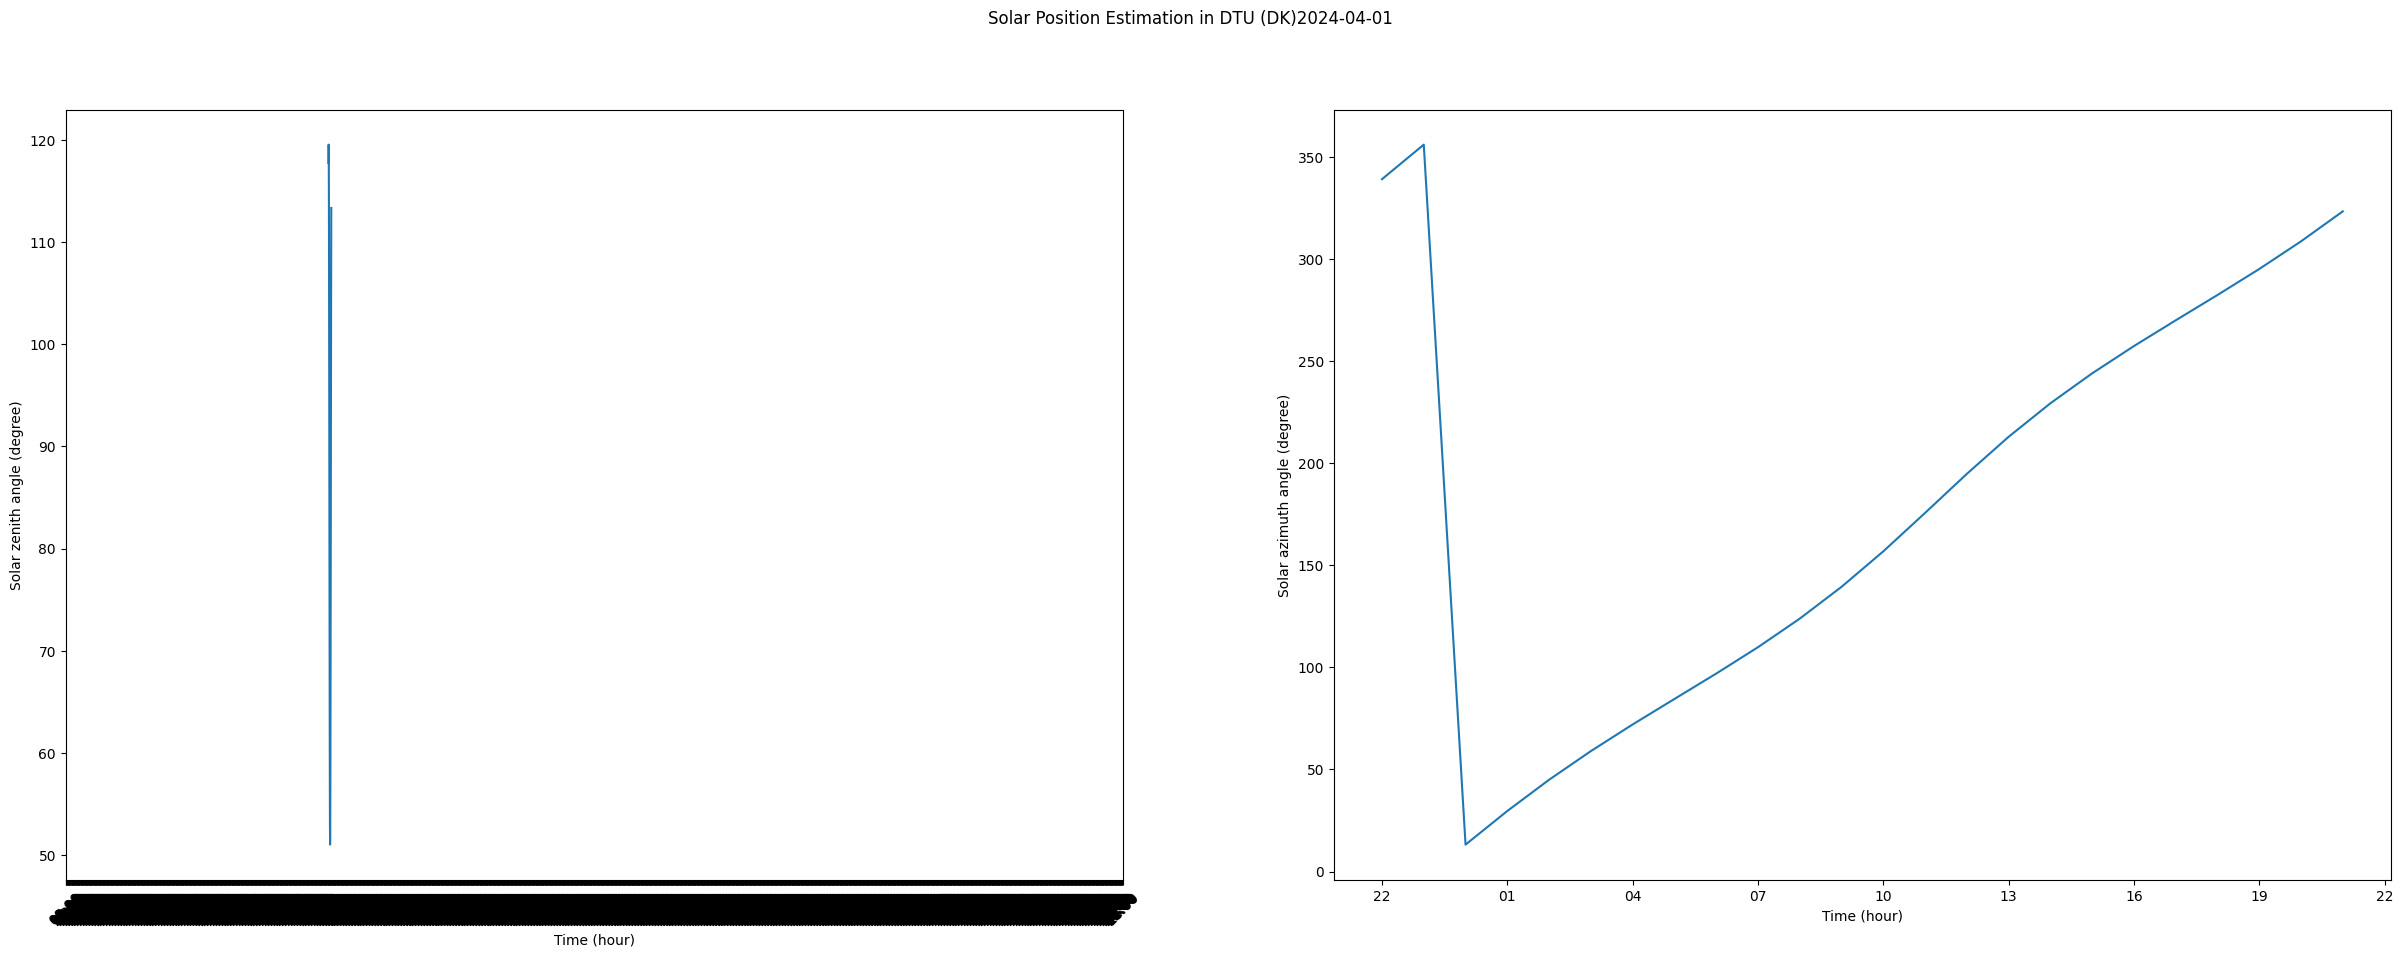

In [ ]:
import matplotlib.dates as mdates

valgt_dato = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

### 3. Plot af solvinklerne

In [ ]:
valgt_dato = "2024-04-01"
print(solpos.loc[valgt_dato].zenith)
print(solpos.loc[valgt_dato].elevation)
print(solpos.loc[valgt_dato].azimuth)

2024-04-01 00:00:00+02:00    117.721727
2024-04-01 01:00:00+02:00    119.519664
2024-04-01 02:00:00+02:00    118.824378
2024-04-01 03:00:00+02:00    115.727960
2024-04-01 04:00:00+02:00    110.603503
2024-04-01 05:00:00+02:00    103.952416
2024-04-01 06:00:00+02:00     96.274249
2024-04-01 07:00:00+02:00     88.016350
2024-04-01 08:00:00+02:00     79.583955
2024-04-01 09:00:00+02:00     71.379223
2024-04-01 10:00:00+02:00     63.850658
2024-04-01 11:00:00+02:00     57.536542
2024-04-01 12:00:00+02:00     53.064272
2024-04-01 13:00:00+02:00     51.036392
2024-04-01 14:00:00+02:00     51.786042
2024-04-01 15:00:00+02:00     55.183283
2024-04-01 16:00:00+02:00     60.715086
2024-04-01 17:00:00+02:00     67.741025
2024-04-01 18:00:00+02:00     75.675287
2024-04-01 19:00:00+02:00     84.030634
2024-04-01 20:00:00+02:00     92.388375
2024-04-01 21:00:00+02:00    100.349100
2024-04-01 22:00:00+02:00    107.487591
2024-04-01 23:00:00+02:00    113.327192
Freq: H, Name: zenith, dtype: float64
20

### 4. Plot solens zenit-, azimut- og elevationsvinkel for hele dagen den 20. april 2024 som funktion af tiden.

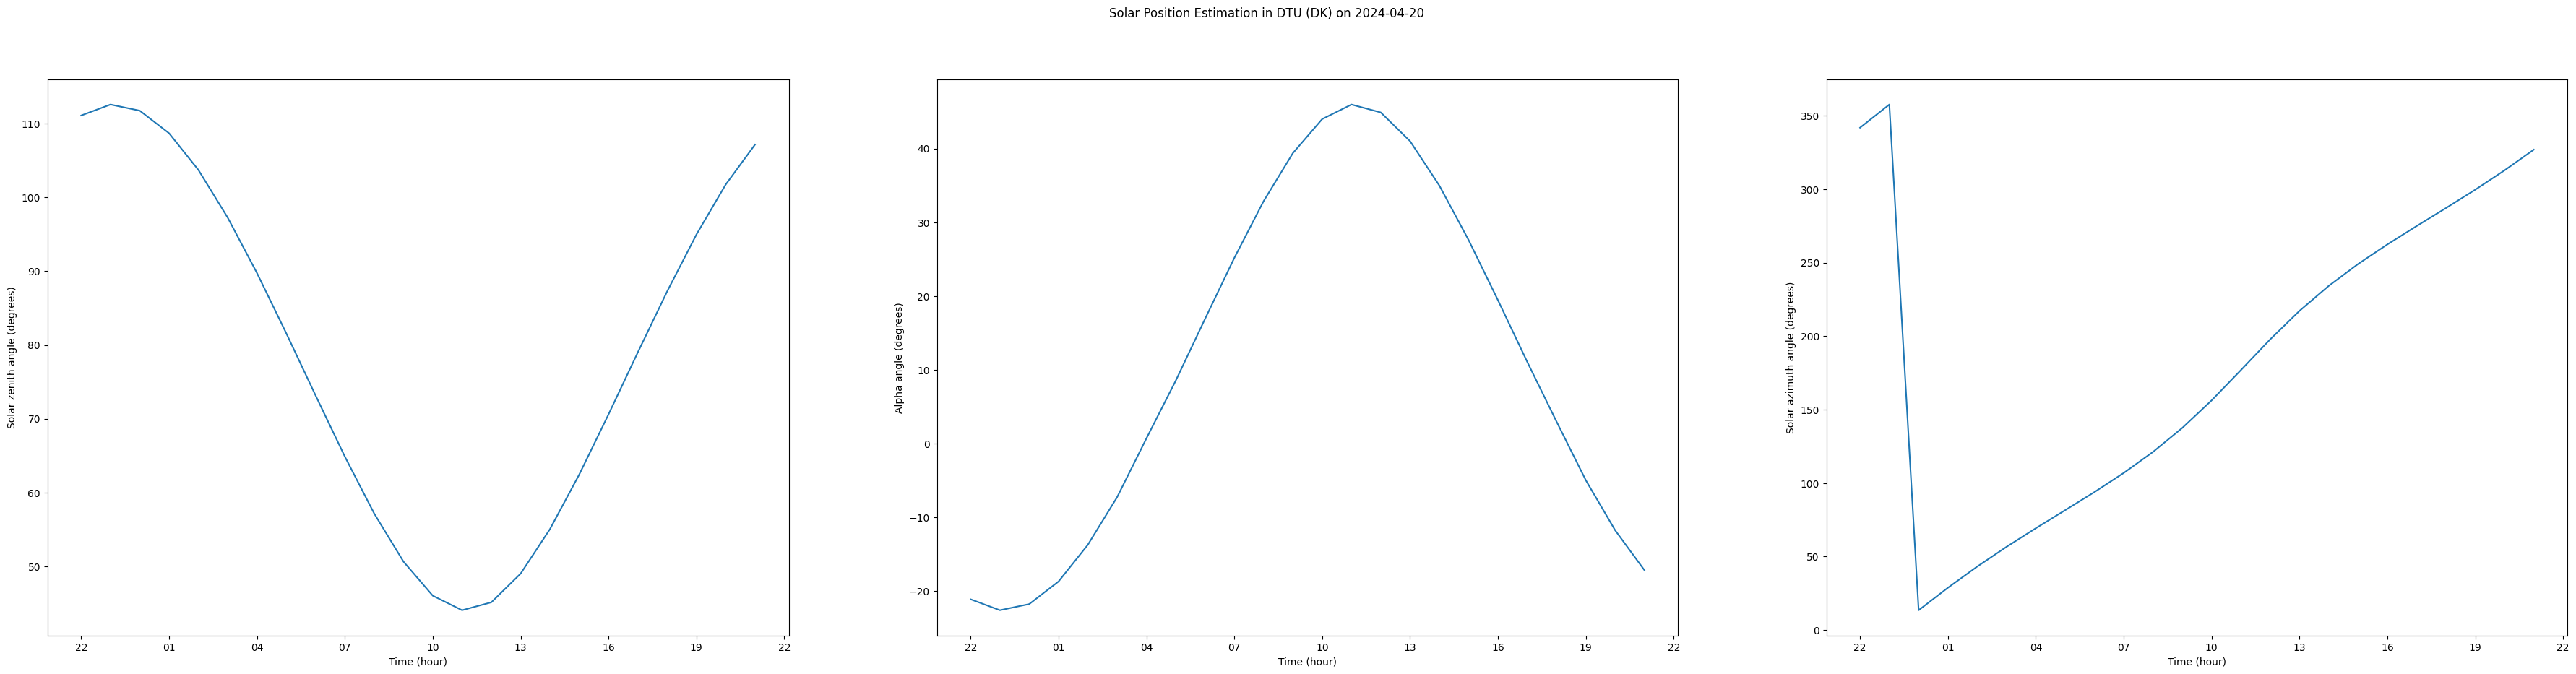

In [ ]:
valgt_dato = "2024-04-20"

solpos['alpha'] = 90 - solpos['zenith']

# Plots for solar zenith, alpha angle, and solar azimuth angles
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(45, 10))
fig.suptitle("Solar Position Estimation in " + site.name + " on " + valgt_dato)

# Plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].index, solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degrees)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# Plot for alpha angle
ax2.plot(solpos.loc[valgt_dato].index, solpos.loc[valgt_dato].apparent_elevation)
ax2.set_ylabel("Alpha angle (degrees)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# Plot for solar azimuth angle
ax3.plot(solpos.loc[valgt_dato].index, solpos.loc[valgt_dato].azimuth)
ax3.set_ylabel("Solar azimuth angle (degrees)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

plt.show()

### 5. Plot solens elevationsvinkel og find ud af hvornår på dagen solen står højest den 20. april 2024. Forklar hvad det betyder når a_s < 0 eller theta_s > 90 grade

In [ ]:
max_elevation_time = solpos.loc[valgt_dato]['apparent_elevation'].idxmax()
max_elevation = solpos.loc[valgt_dato]['apparent_elevation'].max()
print(max_elevation_time, max_elevation)

2024-04-20 13:00:00+02:00 45.96750223437352


### 6. Find tidspunktet for solopgang og solnedgang på DTU den 20. april 2024. Sammenlign med “kendte” værdier fx. fra DMI. 

In [ ]:
# Definer en valgt dato for at beregne solens position.
valgt_dato = "2024-04-20"

# Definer den kritiske zenith-vinkel for solopgang og solnedgang.
kritisk_zenith = 90
# Initialiser en liste til at gemme tidspunkter for solens begivenheder.
event_tider = []

sol_model = solposmin

# Henter zenith-vinkel for solen ved dagens start, og gennemgår disse vinkler dag for dag, for at bestemme tidspunkterne for solopgang og solnedgang.
prev_zenith = sol_model.loc[valgt_dato]['apparent_zenith'].iloc[0]
# Sammenligner den forrige og den nuværende zenith-vinkel for at finde det nøjagtige tidspunkt, hvor solen krydser den kritiske grænse.
for i in range(1, len(sol_model.loc[valgt_dato])):
    current_zenith = sol_model.loc[valgt_dato]['apparent_zenith'].iloc[i]
    if prev_zenith > kritisk_zenith and current_zenith <= kritisk_zenith:
        event_tider.append((sol_model.loc[valgt_dato].index[i - 1], 'solopgang'))
    elif prev_zenith <= kritisk_zenith and current_zenith > kritisk_zenith:
        event_tider.append((sol_model.loc[valgt_dato].index[i], 'solnedgang'))
    prev_zenith = current_zenith

for time, event in event_tider:
    print(f"{event.capitalize()} klokken: {time}, med zenith vinkel: {sol_model.loc[valgt_dato, 'apparent_zenith'][time]}")


Solopgang klokken: 2024-04-20 05:53:00+02:00, med zenith vinkel: 90.07826060147332
Solnedgang klokken: 2024-04-20 20:26:00+02:00, med zenith vinkel: 90.09841324297834


### 7. Find solens højeste punkt på himlen (i grader) på sommersolhverv på DTU, og hvornår på dagen det sker?

In [ ]:
valgt_dato = "2024-06-20"
max_elevation_time = solpos.loc[valgt_dato]['apparent_elevation'].idxmax()
max_elevation = solpos.loc[valgt_dato]['apparent_elevation'].max()
print(max_elevation_time, max_elevation)

2024-06-20 13:00:00+02:00 57.59121086860067


### 8. Lav en Python-funktion som kan beregne solens højeste punkt a_max på himlen (i grader) på en given dato (year-month-day) i en given lokation (fx by) angivet ved en breddegrad og længdegrad

In [ ]:
def higest_sun(dato, lokation, tidszone):
    delta_tid = "Min"  # "Min", "H",

    site = Location(
        lokation[0], lokation[1], "tidszone"
    )  # latitude, longitude, time_zone, altitude, name

    # Definition af tidsintervaller for simulering 
    times = pd.date_range(
        dato + " 00:00:00", dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
        )

    # Estimerer solposition med Lokationsobjektet
    solpos = site.get_solarposition(times)

    max_elevation_time = solpos.loc[valgt_dato]['elevation'].idxmax()
    max_elevation = solpos.loc[valgt_dato]['elevation'].max()
    return (max_elevation, max_elevation_time)

### 9. Skriv en Python-funktion (til brug med NumPy arrays) der omregner fra solens zenith og azimuth til solens position angivet i (x,y,z)-koordinaten.

In [ ]:
def spherical_to_xyz(theta, phi):
    x = r_s * np.sin(theta) * np.cos(phi)
    y = r_s * np.sin(theta) * np.sin(phi)
    z = r_s * np.cos(theta)
    return x, y, z
 
theta = np.array([np.pi/4, np.pi/3])  
phi = np.array([np.pi/6, np.pi/4])  

x, y, z = spherical_to_xyz(theta, phi)
print("X:", x)
print("Y:", y)
print("Z:", z)

X: [9.0018748e+10 9.0018748e+10]
Y: [5.19723484e+10 9.00187480e+10]
Z: [1.03944697e+11 7.35000000e+10]


### 10. Skriv en Python funktion der omregner fra solens position på himlen i (x,y,z)-koordinater til zenit og azimuth (i grader eller radianer). 

In [ ]:
from fractions import Fraction

def float_to_pi_fraction(value):
    """Convert a float value to a string representing the value as a fraction of pi."""

    fraction = Fraction(value).limit_denominator(12)
    if fraction.denominator == 1:
        if fraction.numerator == 1:
            return "pi"
        elif fraction.numerator == 0:
            return "0"
        else:
            return f"{fraction.numerator}pi"
    else:
        return f"{fraction.numerator}pi/{fraction.denominator}"

def xyz_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.where(r != 0, np.arccos(z / r) / np.pi, 0)
    phi = np.arctan2(y, x) / np.pi
    # Convert numerical results to fraction of pi
    theta = np.vectorize(float_to_pi_fraction)(theta)
    phi = np.vectorize(float_to_pi_fraction)(phi)
    return r, theta, phi

r, theta, phi = xyz_to_spherical(x, y, z)
r, theta, phi

x = np.array([15, 45, 90])
y = np.array([15, 45, 90])
z = np.array([3, -1, 0])

r, theta, phi = xyz_to_spherical(x, y, z)
print("Radius r:", r)
print("Theta:", theta)
print("Phi:", phi)


Radius r: [ 21.42428529  63.64746656 127.27922061]
Theta: ['5pi/11' '1pi/2' '1pi/2']
Phi: ['1pi/4' '1pi/4' '1pi/4']


# Effekt- og energiberegning

### 1. Lav en Python-funktion som kan udregne fluxen af solens vektorfelt gennem solpanelets flade for hvert minut gennem dagen

In [ ]:
def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    # Initialiser en liste til at gemme prikprodukterne for hver beregning
    dot_products = []
    theta_sol = (theta_sol*np.pi)/180
    phi_sol = (phi_sol*np.pi)/180
    for i in range(len(theta_sol)):
        #print(theta_sol)
        #hvis solen er på den modsatte side af jorden:
        if theta_sol[i] >= 0 and theta_sol[i] <= np.pi/2:
            
            # Beregn enhedsvektorer for solens position og panelets position
            us = np.array([np.sin(theta_sol[i]) * np.cos(phi_sol[i]),
                        np.sin(theta_sol[i]) * np.sin(phi_sol[i]),
                        np.cos(theta_sol[i])])
            
            # Beregn enhedsvektoren for solpanelets normal ud fra de sfæriske koordinater 
            up = np.array([np.sin(theta_panel) * np.cos(phi_panel),
                            np.sin(theta_panel) * np.sin(phi_panel),
                            np.cos(theta_panel)])
            
        
            # Beregn prikproduktet af de to enhedsvektorer, som repræsenterer vinklen mellem dem
            dot_product = np.dot(us, up)
        else: 
            dot_product = 0
        # Prikproduktet må ikke være negativt; om nødvendigt sættes det til 0
        dot_product = max(0, dot_product)
        # Tilføj det beregnede prikprodukt til listen
        dot_products.append(dot_product)
        # Prikproduktet mellem solens og solpanelets enhedsvektorer udskrives
        # print("Prikproduktet af us og up er:", dot_product)
    # Returner prikproduktet, hvis det er positivt, ellers returner 0
    return dot_products

In [ ]:
def flux_day(valgt_dato, panelets_azimuth, panelets_zenith):
    s = 1100
    A0 = 0.5
    s0 = s*A0
    vinkel = solar_panel_projection((solposmin.loc[valgt_dato].zenith).to_numpy(), (solposmin.loc[valgt_dato].azimuth).to_numpy(), panelets_zenith, panelets_azimuth)
    return np.array(vinkel)*s0*L*B
valgt_dato = "2024-04-20"
print(flux_day(valgt_dato, np.pi, 0))
result_array = flux_day(valgt_dato, np.pi, 0)
print(result_array[719])

[0. 0. 0. ... 0. 0. 0.]
762.3232844154749


### 2. Find energiproduktionen ved integration af fluxen

In [ ]:
def trapezt_day(valgt_dato, panelets_azimuth, panelets_zenith):
    flux_val = flux_day(valgt_dato, panelets_azimuth, panelets_zenith)
    value = 0
    efficiency = (425 / (L*B)) /1000
    for i in range(1,len(flux_val)):
        value += ((flux_val[i-1] + flux_val[i]) / 2)*60*efficiency
    return value

print(trapezt_day(valgt_dato, np.pi/2, 0))

5408918.8328180425


### 3. Peg solpanelet mod syd, dvs azimut-vinkel 180 . Udregn energiproduktionen for den 20.april for hver heltals vinkel  mellem 0 og 90 grader.

In [ ]:
valgt_dato = '2024-04-20'
energy_vinkel = [0 for i in range(91)]
for i in range(91):
    energy_vinkel[i] = (trapezt_day(valgt_dato, np.pi, i*(np.pi/180)))
print(np.max(energy_vinkel))
print(np.argmax(energy_vinkel))
print(energy_vinkel)

6635427.684440617
37
[5408918.8328180425, 5470554.211146057, 5530982.820753659, 5590141.45131631, 5647991.535972092, 5704487.45147882, 5759585.265304659, 5813247.400447441, 5865438.3946261145, 5916124.073467608, 5965278.631286394, 6012863.060995946, 6058851.005608014, 6103228.055784293, 6145950.157498071, 6187015.085961829, 6226378.625896511, 6264046.124522477, 6299969.692010084, 6334154.241177228, 6366574.8838693295, 6397206.337650936, 6426036.060480715, 6453071.1680369, 6478277.689978553, 6501644.580402545, 6523161.4355671005, 6542818.499615501, 6560606.67003392, 6576517.502838984, 6590544.931309968, 6602680.217998266, 6612915.935740718, 6621246.354417294, 6627666.424786484, 6632171.782012296, 6634759.018635583, 6635427.684440617, 6634173.369679502, 6630994.439775187, 6625889.9572101915, 6618859.683287776, 6609904.079595178, 6599024.309129599, 6586227.989218005, 6571514.410308994, 6554884.764340263, 6536349.731702149, 6515908.895371107, 6493566.191257695, 6469328.228331656, 6443210.3

In [ ]:
data = [5408918.8328180425, 5470554.211146057, 5530982.820753659, 5590141.45131631, 5647991.535972092, 5704487.45147882, 5759585.265304659, 5813247.400447441, 5865438.3946261145, 5916124.073467608, 5965278.631286394, 6012863.060995946, 6058851.005608014, 6103228.055784293, 6145950.157498071, 6187015.085961829, 6226378.625896511, 6264046.124522477, 6299969.692010084, 6334154.241177228, 6366574.8838693295, 6397206.337650936, 6426036.060480715, 6453071.1680369, 6478277.689978553, 6501644.580402545, 6523161.4355671005, 6542818.499615501, 6560606.67003392, 6576517.502838984, 6590544.931309968, 6602680.217998266, 6612915.935740718, 6621246.354417294, 6627666.424786484, 6632171.782012296, 6634759.018635583, 6635427.684440617, 6634173.369679502, 6630994.439775187, 6625889.9572101915, 6618859.683287776, 6609904.079595178, 6599024.309129599, 6586227.989218005, 6571514.410308994, 6554884.764340263, 6536349.731702149, 6515908.895371107, 6493566.191257695, 6469328.228331656, 6443210.386244808, 6415210.948174688, 6385339.0236536935, 6353610.765062788, 6320027.216750311, 6284600.311568952, 6247347.476429195, 6208271.618213415, 6167384.831900534, 6124707.783423444, 6080247.336919158, 6034018.842158534, 5986041.067468632, 5936322.328607427, 5884878.624951123, 5831727.091203468, 5776891.66503977, 5720382.710692256, 5662222.939656798, 5602430.138345808, 5541020.668100068, 5478014.8463108735, 5413433.591037803, 5347298.413334453, 5279631.409270571, 5210455.251690009, 5139793.18171065, 5067669.826860125, 4994108.438527998, 4919133.3409973, 4842769.992332301, 4765046.239687772, 4685987.447314293, 4605620.575217616, 4523973.074783669, 4441072.878115557, 4356948.387152099, 4271628.462571617, 4185142.412485773, 4097533.3254362782]

max_value = max(data)
max_index = data.index(max_value)

print("Index of the highest value:", max_index)


Index of the highest value: 37


# Optimal vinkel 

### 1. Peg solpanelet mod syd, dvs azimut-vinkel 180 . Udregn energiproduktionen for hele 2024 for hver heltals vinkel  mellem 0 og 90 grader.

In [ ]:
def solar_panel_projection_year(theta_sol, phi_sol, theta_panel, phi_panel):
    dot_products = []
    theta_sol = (theta_sol*np.pi)/180
    phi_sol = (phi_sol*np.pi)/180
    if theta_sol >= 0 and theta_sol <= np.pi/2:

            # Beregn enhedsvektorer for solens position og panelets position
        us = np.array([np.sin(theta_sol) * np.cos(phi_sol),
                        np.sin(theta_sol) * np.sin(phi_sol),
                        np.cos(theta_sol)])
                        
        
        
        up = np.array([np.sin(theta_panel) * np.cos(phi_panel),
                            np.sin(theta_panel) * np.sin(phi_panel),
                            np.cos(theta_panel)])

        dot_product = np.dot(us, up)
        # Beregn prikproduktet
        # print(np.dot(us, up))
    else:
        dot_product = 0

    #print(dot_product)
    dot_product = max(0, dot_product)
    dot_products.append(dot_product)
        #print("Prikproduktet af us og up er:", dot_product)
        # Returner prikproduktet, hvis det er positivt, ellers returner 0
    return dot_products

In [ ]:
def trapezt_year(valgt_dato, panelets_azimuth, panelets_zenith):
    flux_val = flux_year(panelets_azimuth, panelets_zenith)
    value = []

    efficiency = (425 / (L*B)) /1000
    count = 0
    summation = 0
    for i in range(1,len(flux_val)):
        summation += ((flux_val[i-1] + flux_val[i]) / 2)*60*efficiency*60 #we mulitply by 60*60 to find the summation for seconds,
        count += 1
        if count == 24:
            value.append(summation)
            summation = 0
            count = 0
    return value

In [ ]:
def flux_year(panelets_azimuth, panelets_zenith):
    vinkel = []
    s = 1100
    A0 = 0.5
    s0 = s*A0
    for i in range(len(solpos.zenith)):
        vinkel.append(solar_panel_projection_year((solpos.iloc[i].zenith), (solpos.iloc[i].azimuth), panelets_zenith, panelets_azimuth))
    return np.array(vinkel)*s0*L*B

In [ ]:
#Optimal vinkel
energi_udfra_zenith = []
for i in range(90):
    #print(i)
    energi_udfra_zenith.append(sum(trapezt_year(times_h, np.pi, np.deg2rad(i))))

KeyboardInterrupt: 

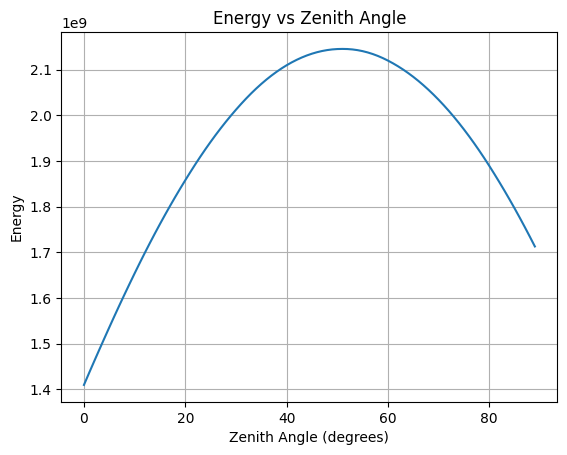

In [ ]:
#Plot af zenith vinkler ift. energiproduktion
def calculate_energy(zenith_angle):
    energy = sum(trapezt_year(times_h, np.pi, np.deg2rad(zenith_angle)))
    return energy

energi_udfra_zenith = [calculate_energy(angle) for angle in range(90)]

# Plotting
angles = np.arange(0, 90)
plt.plot(angles, energi_udfra_zenith)
plt.xlabel('Zenith Angle (degrees)')
plt.ylabel('Energy')
plt.title('Energy vs Zenith Angle')
plt.grid(True)
plt.show()

In [ ]:
print(np.argmax(energi_udfra_zenith), np.max(energi_udfra_zenith), len(energi_udfra_zenith))

51 2145376375.3888428 90


### 2. Find den optimale vinkel θ_p og angiv energiproduktionen. Hvor meget mindre bliver energiproduktionen hvis phi_p fx er 175 eller lignende?

In [ ]:
zenith = 51
azimuth_vinkel = []
for i in range(135,225):
    print(i)
    azimuth_vinkel.append(sum(trapezt_year(times, (np.deg2rad(i)), np.deg2rad(zenith))))
print(azimuth_vinkel)

135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
[array([1.96444099e+09]), array([1.9727375e+09]), array([1.98088902e+09]), array([1.98883738e+09]), array([1.99656163e+09]), array([2.00405067e+09]), array([2.01126903e+09]), array([2.01829038e+09]), array([2.0251595e+09]), array([2.03200847e+09]), array([2.03869092e+09]), array([2.04508904e+09]), array([2.0512603e+09]), array([2.05711974e+09]), array([2.06259907e+09]), array([2.06769662e+09]), array([2.07241084e+09]), array([2.0768768e+09]), array([2.08124879e+09]), array([2.08542514e+09]), array([2.08948901e+09]), array([2.09387818e+09]), array([2.09832865e+09]), array([2.1024596e+09]), array([2.10658236e+09]), array([2.11062581e+

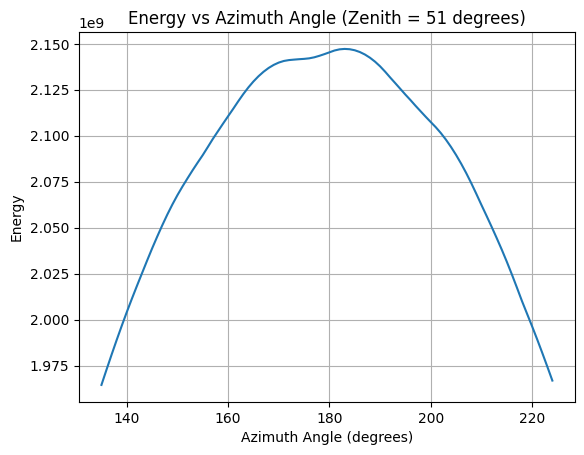

In [ ]:
#plot af azimuthvinkler ift energiproduktion, når zentih-vinklen er 180 grader. 

zenith = 51
azimuth_vinkel = []
for i in range(135, 225):
    azimuth_energy = sum(trapezt_year(times, np.deg2rad(i), np.deg2rad(zenith)))
    azimuth_vinkel.append(azimuth_energy)

# Plotting
azimuth_angles = np.arange(135, 225)
plt.plot(azimuth_angles, azimuth_vinkel)
plt.xlabel('Azimuth Angle (degrees)')
plt.ylabel('Energy')
plt.title(f'Energy vs Azimuth Angle (Zenith = {zenith} degrees)')
plt.grid(True)
plt.show()


In [ ]:
print(np.argmax(azimuth_vinkel), np.max(azimuth_vinkel))

48 2147227824.669961


hvilket er 48+135 = 183, så optimal vinklen er så 183 grader azimuth

### 3. Lav en realistisk opsætning af  antal solpaneler, hvor I vælger  efter en typisk opsætning på et parcelhus. Solpaneler opsættes efter den optimale vinkel. Udregn energiproduktionen for hver dag og plot dette som funktion af tiden (angivet i dage).

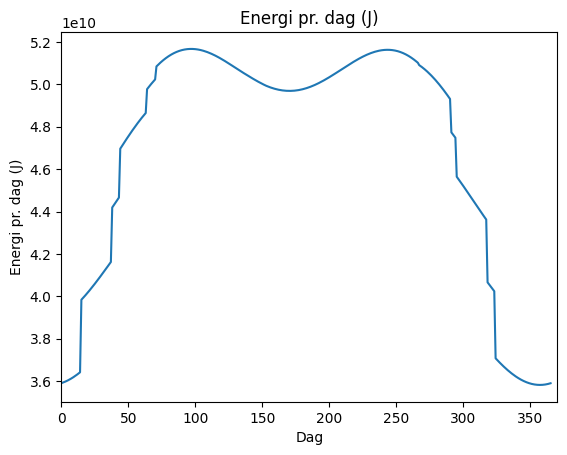

In [ ]:
energi_produktion_per_dag = []
zenith = 51
antal_solceller = 8
energi_produktion_per_dag.append(np.array(trapezt_year(times, np.pi, np.deg2rad(zenith)))*antal_solceller) 
t = [i for i in range(1,366)]
plt.figure()
plt.xlim(0,370)
plt.title('Energi pr. dag (J)')
plt.ylabel('Energi pr. dag (J)')
plt.xlabel('Dag')
plt.plot(t,np.squeeze(energi_produktion_per_dag))

# Solpanelsfilm på en krum flade

In [ ]:
from sympy import *
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pvlib
from pvlib.location import Location
import matplotlib.dates as mdates
from dtumathtools import *
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-1"
slut_dato = "2024-12-31"
delta_tid = "h"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of DTU, Lyngby (Denmark)
site = Location(
    55.784932, 12.519436, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
    )


# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)


In [ ]:
#parametrisering af en halvkugle
#diffinering af symboler
r, u, v, s, q, p, a = symbols('r u v s q p a')
#opskriver parametriseringen af halvkuglen
r = Matrix([[a*sin(u)*cos(v)+p],[a*sin(u)*sin(v)+q],[a*cos(u)+s]])
# u tilhørrer [0;pi/2]
# v tilhører [0;2pi]
# a er radius lig 0.25
#sætter s, q og p til 0
r = Matrix([[a*sin(u)*cos(v)],[a*sin(u)*sin(v)],[a*cos(u)]])
#differentiere r med hensyn til u og v
rm_v = r.diff(v)
rm_u = r.diff(u)
#finder krydsproduktet af de afledte
cross_product = rm_u.cross(rm_v)
display(simplify(cross_product))
r_jac = r.jacobian([u,v])
det(r_jac.T*r_jac) != 0
display(trigsimp(r_jac)), display(det(r_jac.T*r_jac).trigsimp())

In [ ]:
#funktion til at lave en liste over krydsprodukteterne/normalvektorne af de afledte af parametriseringen ved at variere u og v
def up_list():
    up_list_vals = []
    for i in range(0,91,5):
        for j in range(0,360,5):
            up = cross_product.subs({u:np.deg2rad(i),v:np.deg2rad(j), a:0.25})
            up_list_vals.append(up)
    return up_list_vals

In [ ]:
#funktion til at bestemme prikproduktet mellem solens vektorfelt og panelets normalvektor
def solar_panel_projection_sphere(theta_sol, phi_sol, up_vals):
    #print('up_vals', up_vals)
    dot_products = []
    dot_products_vinkel = []
    #omregner solens position fra grader til radianer
    theta_sol = np.deg2rad(theta_sol)
    phi_sol = np.deg2rad(phi_sol)
    #tjekker om solen er over horisonten
    if theta_sol >= 0 and theta_sol <= np.pi/2:

        
        #Beregner solens vektor udfra solens position
        us = Matrix([np.sin(theta_sol) * np.cos(phi_sol),
                        np.sin(theta_sol) * np.sin(phi_sol),
                        np.cos(theta_sol)])
        
        #Beregner prikproduktet mellem solens vektor og panelets normalvektor
        for i in range(len(up_vals)):
            dot_product = np.dot(up_vals[i].T, us)
            #Prikproduktet må ikke være negativt; om nødvendigt sættes det til 0
            dot_product = max(0, dot_product)
            dot_products_vinkel.append(dot_product)

        #finder summen af prikprodukterne for den time
        product_vinkel_sum = sum(dot_products_vinkel)
        dot_products.append(product_vinkel_sum)

        


    else:
        dot_product = 0
        dot_products.append(dot_product)



        # Returner prikproduktet, hvis det er positivt, ellers returner 0
    return dot_products


In [ ]:
#funktion til at bestemme fluxen udfra prikproduktet mellem solens vektorfelt og panelets normalvektor
def flux_sphere():
    up_list_vals = up_list()
    projektioner = np.array([])
    s = 1100
    A0 = 0.5
    s0 = s*A0
    for i in range(len(solpos.zenith)):
        print(i)
        projektioner = np.append(projektioner, solar_panel_projection_sphere((solpos.iloc[i].zenith), (solpos.iloc[i].azimuth), up_list_vals))
        #Her ganges projektionerne med overfladearealet af halvkuglen og intensiteten af sollys og divideres med antallet af normalvektorer, så vi får en gennemsnitlig værdi. 
    return projektioner*((s0*4*np.pi*0.25**2*1/2)/((len(up_list_vals))))

In [ ]:
#funktion der ved brug af trapezmetoden bestemmer arealet under grafen af fluxen over et år, for vores halvkugle.
def trapez_sphere(valgt_dato):
    flux_val = flux_sphere()
    print('flux_val: ',flux_val,'flux_val len: ', len(flux_val))
    value = []
    efficiency = (212.7 / (0.5*4*pi*0.25**2)) /1000
    count = 0
    summation = 0
    for i in range(1,len(flux_val)):
        summation += ((flux_val[i-1] + flux_val[i]) / 2)*efficiency*60*60 #vi ganger med 60*60 for at få det i Joule, da vi har det i timer først
        count += 1
        if count == 24:
            value.append(summation)
            summation = 0
            count = 0
    return value

In [ ]:
#kalder trapez funktionen
sphere_energi = trapez_sphere(times)

In [ ]:
(((np.sum(sphere_energi))/(4*np.pi*0.25**2*1/2))/3600000).evalf()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
days = np.arange(1, 366)
energy_production = sphere_energi

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days, energy_production, color='blue', marker='o', linestyle='-')
plt.title('Energy Produktion for hver dag på et år')
plt.xlabel('dage')
plt.ylabel('Energy Produktion(Joule)')
plt.grid(True)
plt.show()

## Forbrugermønstre

In [ ]:
# load energiforbrug data
power_data = pd.read_csv('household_power_consumption.txt', sep=';')

# vi vælger kun året 2009 da dette år ikke mangler nogle værdier
power_data['Date'] = pd.to_datetime(power_data['Date'])
power_data['Year'] = power_data['Date'].dt.year
power_data_2009 = power_data[power_data['Year'] == 2009]

# sæt alle NaNs og ikke værdier til nul
power_data_2009['Sub_metering_3'] = pd.to_numeric(power_data_2009['Sub_metering_3'], errors='coerce').fillna(0)
power_data_2009['Sub_metering_2'] = pd.to_numeric(power_data_2009['Sub_metering_2'], errors='coerce').fillna(0)
power_data_2009['Sub_metering_1'] = pd.to_numeric(power_data_2009['Sub_metering_1'], errors='coerce').fillna(0)
power_data_2009['Global_active_power'] = pd.to_numeric(power_data_2009['Global_active_power'], errors='coerce').fillna(0)

# udregn energiforbruget ud fra dataet
power_data_2009['Energy'] = power_data_2009['Global_active_power'].astype(float)*1000/60 - \
    power_data_2009['Sub_metering_1'].astype(float) - \
        power_data_2009['Sub_metering_2'].astype(float) - \
            power_data_2009['Sub_metering_3'].astype(float)

In [ ]:
# Lav tiden om til et pandas time object, og sæt det til at være indexet
energy_data_h = power_data_2009['Date Time Energy'.split()]
energy_data_h['Date'] = energy_data_h['Date'].dt.strftime('%Y-%m-%d')
energy_data_h['datetime'] = pd.to_datetime(energy_data_h['Date'] + ' ' + energy_data_h['Time'])
energy_data_h.drop(['Date', 'Time'], axis=1, inplace=True)
energy_data_h.set_index('datetime', inplace=True)

# Få energi forbruget i timer frem for minutter
energy_data_h = energy_data_h.resample('H').sum()

energy_data_h=energy_data_h.reset_index()
energi_forbrug = (energy_data_h['Energy']).to_numpy() / 1000

# find differencen mellem produceret strøm og forbrugt strøm
net_energi = energi_prod - energi_forbrug
net_energi.sum(),energi_forbrug.shape

In [ ]:
if energi_forbrug.shape[0] % 168 != 0:
    hourly_data = energi_forbrug[:-(energi_forbrug.shape[0] % 168)]
weekly_data = hourly_data.reshape(-1, 168)

# Step 2: Sum over each week
weekly_energy = weekly_data.sum(axis=1)

# Step 3: Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(weekly_energy, color='mediumseagreen')
plt.title('Ugentligt energiforbrug og produktion i 2009')
plt.xlabel('Ugenummer')
plt.ylabel('Energi (kWh)')
plt.grid(True)
plt.show()

In [ ]:
week_value = []
count = 0
summation = 0
for i in range(len(net_energi)):
    summation += net_energi[i]
    if count == 168:
        week_value.append(summation)
        summation = 0
        count = 0
    count += 1
print(week_value)

date_range = pd.date_range(start='2009-01-01', periods=len(week_value), freq='W')

# Creating a DataFrame to associate dates with data
df = pd.DataFrame(week_value, index=date_range, columns=['Value'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Value'], color='mediumseagreen')
plt.title('Weekly Data for the Year 2009')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.tight_layout()
plt.show()



### Load energipriserne fra 2009

In [ ]:
energi_priser = pd.read_excel('data/Elspotprices.xlsx')
energi_priser = energi_priser[energi_priser['PriceArea'] == 'DK1']
energi_priser.loc[8760] = 241.089
energi_priser.drop('HourUTC PriceArea SpotPriceEUR'.split(), axis=1, inplace=True)
energi_priser.set_index('HourDK', inplace=True)
energi_priser = energi_priser.to_numpy().squeeze() / 100
energi_priser.shape

### Beregn fluxmatricen for hver kombination af azimut og zenit

In [ ]:
horizontal_angles = range(1, 90) 
azimuth_angles = range(90, 270)  

hours_in_year = 8760

# Gør 3d array klar med shapen (89, 180, 8760)
flux_matrix = np.zeros((len(horizontal_angles), len(azimuth_angles), hours_in_year))

for i, h_angle in enumerate(horizontal_angles):
    print(f'Zenith vinkel: {h_angle}')
    for j, a_angle in enumerate(azimuth_angles):

        # Beregn fluxen for hver kombination af azimuth og zenith
        the_flux = flux_year(np.deg2rad(a_angle), np.deg2rad(h_angle))

        indx_for_azimuth = a_angle - min(azimuth_angles)

        flux_matrix[i, indx_for_azimuth, :] = the_flux  # Adjust the index for azimuth_angles by subtracting 90

np.save('flux_matrix.npy', flux_matrix)
flux_matrix_saved = np.load('flux_matrix.npy')

## beregn energien produceret for hver vinkel vha trapez metoden

In [ ]:
efficiency = (425 / (L*B)) / 1000
antal_solceller = 8

energy_matrix = np.zeros((flux_matrix_saved.shape[0], flux_matrix_saved.shape[1], 8760))

for i in range(energy_matrix.shape[0]):
    print(f'Zenith vinkel: {i}')
    for j in range(energy_matrix.shape[1]):
        summation = 0
        flux = flux_matrix_saved[i,j]
        for f in range(1, len(flux)):
            # estimer arealet under kurven mellem to datapunkter vha. trapez metoden
            # vi ganger med en faktor 60*60*efficiency, for at få energien i Joules
            energy_matrix[i,j,f] = ((flux[f-1] + flux[f]) / 2)*60*efficiency*60

### Find indexet hvor energiomkostningerne er lavest

In [ ]:
# beregn net energien
net_energi_matrix = kwh_energy_matrix - energi_forbrug
net_energi_matrix[net_energi_matrix > 0] = 0

# beregn prisen time for time, hvor overskudsenergi giver nul
cost_matrix = net_energi_matrix * energi_priser

# få den den årlige energipris for hver vinkel
annual_cost = np.sum(cost_matrix, axis=2)

# find index på laveste pris
max_index_flat = np.argmax(annual_cost)
i, j = np.unravel_index(max_index_flat, annual_cost.shape)
i,j

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=92e57f95-1e1d-4549-adb8-f228b56f3461' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>